# Ron High

In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet("amalgamated.parquet")

In [3]:
yfinance_metrics = [
    "ETH-BTC_High",
    "ETH-BTC_Low",
    "ETH-CAD_High",
    "ETH-CAD_Low",
    "BTC-CAD_High",
    "BTC-CAD_Low",
    'Global_Liquidity_Index'
]

coinmetrics_metrics = [
    "AdrBalNtv0.01Cnt",
    "AdrBalNtv0.1Cnt",
    "AdrBalNtv1Cnt",
    "AdrBalNtv10Cnt",
    "BlkSizeMeanByte",
    "CapRealUSD",
    "FeeByteMeanNtv",
    "FlowInExNtv",
    "FlowOutExNtv",
    "FlowTfrFromExCnt",
    "NDF",
    "SplyAct1d",
    "SplyActPct1yr",
    "TxCnt",
    "VelCur1yr"
]

# For BTC
btc_prefixed_metrics = ['btc_' + metric for metric in coinmetrics_metrics]

# For ETH
eth_prefixed_metrics = ['eth_' + metric for metric in coinmetrics_metrics]

# Combine both lists if you need a single list with all prefixed metrics
combined_prefixed_metrics = btc_prefixed_metrics + eth_prefixed_metrics

metrics = yfinance_metrics + combined_prefixed_metrics
df = df[metrics]

In [4]:
# Assuming df is your DataFrame after resampling and you've already dropped NA values
df.dropna(inplace=True)

# Add an assertion to ensure there are no NA values in the DataFrame
assert df.isnull().sum().sum() == 0, "DataFrame contains NA values"

df

,ETH-BTC_High,ETH-BTC_Low,ETH-CAD_High,ETH-CAD_Low,BTC-CAD_High,BTC-CAD_Low,Global_Liquidity_Index,btc_AdrBalNtv0.01Cnt,btc_AdrBalNtv0.1Cnt,btc_AdrBalNtv1Cnt,...,eth_CapRealUSD,eth_FeeByteMeanNtv,eth_FlowInExNtv,eth_FlowOutExNtv,eth_FlowTfrFromExCnt,eth_NDF,eth_SplyAct1d,eth_SplyActPct1yr,eth_TxCnt,eth_VelCur1yr
2019-01-06,0.039806,0.038577,212.861397,198.961952,5304.894043,5124.658447,11340.606080,6461412.5,2543183.0,704962.0,...,29018820445.344917,0.000003,667205.252013,690006.461584,19225.5,0.636272,10782148.613771,72.207358,530293.5,11.447523
2019-01-13,0.037518,0.034565,201.255341,167.438217,5376.820801,4848.249023,11612.244253,6482061.0,2548197.0,706522.0,...,28663670823.5494,0.000003,559481.952289,496416.452759,20872.0,0.638397,10112044.745759,71.725174,550964.0,10.583022
2019-01-20,0.033768,0.033124,166.959579,159.659409,4936.204590,4808.473633,11061.689523,6547185.0,2558280.0,708796.0,...,28314417747.238216,0.000004,438547.508157,458874.107464,18192.0,0.638271,11738107.990957,71.951333,538899.0,9.72648
2019-01-27,0.032671,0.032355,157.590332,153.457352,4829.049805,4749.490723,10902.737330,6588638.0,2562562.0,711914.0,...,27934971350.679241,0.000003,390411.930389,366666.745414,16613.0,0.637236,11044056.233823,71.550401,520130.0,9.205846
2019-02-03,0.031439,0.030559,144.951599,139.241577,4613.910645,4527.285645,10448.179303,6649261.0,2568307.0,714664.0,...,27622742238.969894,0.000003,386331.94357,400485.468348,17297.0,0.637222,10427630.110494,70.949492,517057.0,8.835763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-04,0.053801,0.053481,3113.128662,3042.415771,58429.691406,56831.171875,122454.180197,12619292.0,4572105.0,1019807.0,...,166826521384.526001,0.000003,333278.414166,335365.852424,102151.0,0.677078,12173746.145186,36.08737,1115710.0,6.050232
2024-02-11,0.053729,0.053706,3289.232178,3173.687988,59694.683594,57678.031250,125879.094272,12572725.0,4567171.0,1019356.0,...,168141406775.576691,0.000005,347428.606404,369227.537384,103803.0,0.678218,11882806.095639,35.867592,1075272.0,6.048036
2024-02-18,0.053777,0.053241,3774.248291,3555.355225,70401.203125,66844.632812,146207.883586,12511730.0,4556762.0,1017938.0,...,174331122786.240967,0.000003,306990.77022,337812.22673,96898.0,0.67948,12355803.333117,35.737851,1102512.0,6.039153
2024-02-25,0.057843,0.056463,4050.259277,3889.075195,70593.679688,68691.062500,148970.534800,12502508.0,4557570.0,1018191.0,...,177742339420.690826,0.000004,338244.178803,369824.650815,107578.0,0.680504,11852417.755627,35.479217,1102202.0,6.035038


In [5]:
import pandas as pd
import numpy as np
import torch

from gluonts.dataset.common import ListDataset
from gluonts.torch.model.tft import TemporalFusionTransformerEstimator
from gluonts.transform.feature import MissingValueImputation

torch.set_float32_matmul_precision('high')
                                   
# Assuming df is your DataFrame with the data
target_column = 'BTC-CAD_High'  # Replace with your target column name

# Ensure the DataFrame's index is a datetime index and set the frequency explicitly if needed
df.index = pd.to_datetime(df.index)
freq = "W"  # Set the frequency of your data, e.g., 'D' for daily. Adjust as needed.
df = df.asfreq(freq)

# Define the prediction length
prediction_length = 6  # Set your prediction length

# Select dynamic features from the DataFrame, excluding the target column
past_dynamic_feature_columns = df.columns.drop(target_column)  # This excludes the target column

# Extract dynamic features as a numpy array
past_dynamic_features = df[past_dynamic_feature_columns].values.transpose()

# Assuming all dynamic features are known in the future, adjust the dimensions accordingly
past_dynamic_dims  = [1] * len(past_dynamic_feature_columns)  # Adjust based on actual dynamic features

# Make sure the lengths match when creating ListDataset
training_data = ListDataset([
    {
        "start": df.index[0],
        "target": df[target_column][:-prediction_length],
        "past_feat_dynamic_real": past_dynamic_features[:, :-prediction_length]
    }
], freq=freq)

# Adjust the slicing for dynamic features for the test dataset to ensure correct dimensions
test_past_dynamic_features_sliced = past_dynamic_features[:, -prediction_length:]

test_data = ListDataset([
    {
        "start": df.index[-prediction_length],
        "target": df[target_column][-prediction_length:].values,
        "past_feat_dynamic_real": test_past_dynamic_features_sliced
    }
], freq=freq)

# Initialize the Temporal Fusion Transformer Estimator
estimator = TemporalFusionTransformerEstimator(
    freq=freq,
    prediction_length=prediction_length,
    context_length=12,  # Optional: adjust based on your needs
    num_heads=32,
    hidden_dim=1024,
    variable_dim=1024,
    past_dynamic_dims= past_dynamic_dims,
    quantiles=[0.1, 0.5, 0.9],  # Specifying the quantiles for forecasting
    lr=0.001,
    weight_decay=1e-08,
    dropout_rate=0.1,
    patience=10,
    batch_size=128,
    num_batches_per_epoch=100,
    trainer_kwargs={'max_epochs': 1000},  # Adjust 'gpus' based on your setup
)

# Train the model
predictor = estimator.train(training_data)

# Debugging: Print dimensions to verify alignment
print(f"Past Dynamic Features Training Shape: {past_dynamic_features[:, :-prediction_length].shape}")
print(f"Past Dynamic Features Test Shape: {test_past_dynamic_features_sliced.shape}")

# Collect actual and predicted values for evaluation, including percentiles
actuals = df[target_column][-prediction_length:].values
mean_predictions = []
p10_predictions = []
p50_predictions = []
p90_predictions = []

for forecast in predictor.predict(test_data):
    mean_predictions.append(forecast.mean)
    p10_predictions.append(forecast.quantile(0.1))
    p50_predictions.append(forecast.quantile(0.5))  # Median
    p90_predictions.append(forecast.quantile(0.9))

# Convert lists to numpy arrays for slicing
mean_predictions = np.array(mean_predictions).flatten()[:prediction_length]
p10_predictions = np.array(p10_predictions).flatten()[:prediction_length]
p50_predictions = np.array(p50_predictions).flatten()[:prediction_length]
p90_predictions = np.array(p90_predictions).flatten()[:prediction_length]


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\falty\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\trainer\connectors\logger_connector\logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
C:\Users\fa

Epoch 0: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=1.09e+4]

Epoch 0, global step 100: 'train_loss' reached 10887.94238 (best 10887.94238), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=0-step=100.ckpt' as top 1


Epoch 1: |                                                | 100/? [00:15<00:00,  6.45it/s, v_num=4, train_loss=5.03e+3]

Epoch 1, global step 200: 'train_loss' reached 5025.34277 (best 5025.34277), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=1-step=200.ckpt' as top 1


Epoch 2: |                                                 | 100/? [00:15<00:00,  6.40it/s, v_num=4, train_loss=3.2e+3]

Epoch 2, global step 300: 'train_loss' reached 3197.01416 (best 3197.01416), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=2-step=300.ckpt' as top 1


Epoch 3: |                                                | 100/? [00:15<00:00,  6.38it/s, v_num=4, train_loss=2.21e+3]

Epoch 3, global step 400: 'train_loss' reached 2212.47925 (best 2212.47925), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=3-step=400.ckpt' as top 1


Epoch 4: |                                                | 100/? [00:15<00:00,  6.35it/s, v_num=4, train_loss=1.83e+3]

Epoch 4, global step 500: 'train_loss' reached 1828.43188 (best 1828.43188), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=4-step=500.ckpt' as top 1


Epoch 5: |                                                | 100/? [00:15<00:00,  6.37it/s, v_num=4, train_loss=1.58e+3]

Epoch 5, global step 600: 'train_loss' reached 1576.18481 (best 1576.18481), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=5-step=600.ckpt' as top 1


Epoch 6: |                                                | 100/? [00:15<00:00,  6.32it/s, v_num=4, train_loss=1.48e+3]

Epoch 6, global step 700: 'train_loss' reached 1477.14917 (best 1477.14917), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=6-step=700.ckpt' as top 1


Epoch 7: |                                                | 100/? [00:15<00:00,  6.38it/s, v_num=4, train_loss=1.09e+3]

Epoch 7, global step 800: 'train_loss' reached 1091.57617 (best 1091.57617), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=7-step=800.ckpt' as top 1


Epoch 8: |                                                  | 100/? [00:15<00:00,  6.30it/s, v_num=4, train_loss=884.0]

Epoch 8, global step 900: 'train_loss' reached 883.71716 (best 883.71716), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=8-step=900.ckpt' as top 1


Epoch 9: |                                                  | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=664.0]

Epoch 9, global step 1000: 'train_loss' reached 664.24268 (best 664.24268), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=9-step=1000.ckpt' as top 1


Epoch 10: |                                                 | 100/? [00:16<00:00,  6.23it/s, v_num=4, train_loss=715.0]

Epoch 10, global step 1100: 'train_loss' was not in top 1


Epoch 11: |                                                 | 100/? [00:15<00:00,  6.44it/s, v_num=4, train_loss=631.0]

Epoch 11, global step 1200: 'train_loss' reached 631.25287 (best 631.25287), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=11-step=1200.ckpt' as top 1


Epoch 12: |                                                 | 100/? [00:15<00:00,  6.34it/s, v_num=4, train_loss=652.0]

Epoch 12, global step 1300: 'train_loss' was not in top 1


Epoch 13: |                                                 | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=571.0]

Epoch 13, global step 1400: 'train_loss' reached 570.64960 (best 570.64960), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=13-step=1400.ckpt' as top 1


Epoch 14: |                                               | 100/? [00:15<00:00,  6.39it/s, v_num=4, train_loss=1.09e+3]

Epoch 14, global step 1500: 'train_loss' was not in top 1


Epoch 15: |                                               | 100/? [00:15<00:00,  6.45it/s, v_num=4, train_loss=1.13e+3]

Epoch 15, global step 1600: 'train_loss' was not in top 1


Epoch 16: |                                                 | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=779.0]

Epoch 16, global step 1700: 'train_loss' was not in top 1


Epoch 17: |                                                 | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=556.0]

Epoch 17, global step 1800: 'train_loss' reached 555.93512 (best 555.93512), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=17-step=1800.ckpt' as top 1


Epoch 18: |                                                 | 100/? [00:15<00:00,  6.43it/s, v_num=4, train_loss=572.0]

Epoch 18, global step 1900: 'train_loss' was not in top 1


Epoch 19: |                                                 | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=474.0]

Epoch 19, global step 2000: 'train_loss' reached 474.08942 (best 474.08942), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=19-step=2000.ckpt' as top 1


Epoch 20: |                                                 | 100/? [00:15<00:00,  6.37it/s, v_num=4, train_loss=432.0]

Epoch 20, global step 2100: 'train_loss' reached 431.57407 (best 431.57407), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=20-step=2100.ckpt' as top 1


Epoch 21: |                                                 | 100/? [00:15<00:00,  6.37it/s, v_num=4, train_loss=644.0]

Epoch 21, global step 2200: 'train_loss' was not in top 1


Epoch 22: |                                                 | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=501.0]

Epoch 22, global step 2300: 'train_loss' was not in top 1


Epoch 23: |                                                 | 100/? [00:15<00:00,  6.41it/s, v_num=4, train_loss=480.0]

Epoch 23, global step 2400: 'train_loss' was not in top 1


Epoch 24: |                                                 | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=382.0]

Epoch 24, global step 2500: 'train_loss' reached 382.16403 (best 382.16403), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=24-step=2500.ckpt' as top 1


Epoch 25: |                                                 | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=452.0]

Epoch 25, global step 2600: 'train_loss' was not in top 1


Epoch 26: |                                                 | 100/? [00:15<00:00,  6.53it/s, v_num=4, train_loss=536.0]

Epoch 26, global step 2700: 'train_loss' was not in top 1


Epoch 27: |                                                 | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=346.0]

Epoch 27, global step 2800: 'train_loss' reached 345.60703 (best 345.60703), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=27-step=2800.ckpt' as top 1


Epoch 28: |                                                 | 100/? [00:15<00:00,  6.43it/s, v_num=4, train_loss=491.0]

Epoch 28, global step 2900: 'train_loss' was not in top 1


Epoch 29: |                                                 | 100/? [00:15<00:00,  6.53it/s, v_num=4, train_loss=365.0]

Epoch 29, global step 3000: 'train_loss' was not in top 1


Epoch 30: |                                                 | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=435.0]

Epoch 30, global step 3100: 'train_loss' was not in top 1


Epoch 31: |                                                 | 100/? [00:15<00:00,  6.33it/s, v_num=4, train_loss=369.0]

Epoch 31, global step 3200: 'train_loss' was not in top 1


Epoch 32: |                                                 | 100/? [00:15<00:00,  6.39it/s, v_num=4, train_loss=335.0]

Epoch 32, global step 3300: 'train_loss' reached 334.62753 (best 334.62753), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=32-step=3300.ckpt' as top 1


Epoch 33: |                                                 | 100/? [00:15<00:00,  6.31it/s, v_num=4, train_loss=346.0]

Epoch 33, global step 3400: 'train_loss' was not in top 1


Epoch 34: |                                                 | 100/? [00:15<00:00,  6.41it/s, v_num=4, train_loss=394.0]

Epoch 34, global step 3500: 'train_loss' was not in top 1


Epoch 35: |                                                 | 100/? [00:15<00:00,  6.37it/s, v_num=4, train_loss=434.0]

Epoch 35, global step 3600: 'train_loss' was not in top 1


Epoch 36: |                                                 | 100/? [00:15<00:00,  6.41it/s, v_num=4, train_loss=486.0]

Epoch 36, global step 3700: 'train_loss' was not in top 1


Epoch 37: |                                                 | 100/? [00:15<00:00,  6.40it/s, v_num=4, train_loss=346.0]

Epoch 37, global step 3800: 'train_loss' was not in top 1


Epoch 38: |                                                 | 100/? [00:15<00:00,  6.39it/s, v_num=4, train_loss=373.0]

Epoch 38, global step 3900: 'train_loss' was not in top 1


Epoch 39: |                                                 | 100/? [00:15<00:00,  6.38it/s, v_num=4, train_loss=294.0]

Epoch 39, global step 4000: 'train_loss' reached 293.86234 (best 293.86234), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=39-step=4000.ckpt' as top 1


Epoch 40: |                                                 | 100/? [00:15<00:00,  6.31it/s, v_num=4, train_loss=308.0]

Epoch 40, global step 4100: 'train_loss' was not in top 1


Epoch 41: |                                                 | 100/? [00:15<00:00,  6.32it/s, v_num=4, train_loss=332.0]

Epoch 41, global step 4200: 'train_loss' was not in top 1


Epoch 42: |                                                 | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=454.0]

Epoch 42, global step 4300: 'train_loss' was not in top 1


Epoch 43: |                                                 | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=462.0]

Epoch 43, global step 4400: 'train_loss' was not in top 1


Epoch 44: |                                                 | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=356.0]

Epoch 44, global step 4500: 'train_loss' was not in top 1


Epoch 45: |                                                 | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=268.0]

Epoch 45, global step 4600: 'train_loss' reached 268.44055 (best 268.44055), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=45-step=4600.ckpt' as top 1


Epoch 46: |                                                 | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=243.0]

Epoch 46, global step 4700: 'train_loss' reached 242.67657 (best 242.67657), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=46-step=4700.ckpt' as top 1


Epoch 47: |                                                 | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=317.0]

Epoch 47, global step 4800: 'train_loss' was not in top 1


Epoch 48: |                                                 | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=274.0]

Epoch 48, global step 4900: 'train_loss' was not in top 1


Epoch 49: |                                                 | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=250.0]

Epoch 49, global step 5000: 'train_loss' was not in top 1


Epoch 50: |                                                 | 100/? [00:15<00:00,  6.36it/s, v_num=4, train_loss=243.0]

Epoch 50, global step 5100: 'train_loss' was not in top 1


Epoch 51: |                                                 | 100/? [00:15<00:00,  6.42it/s, v_num=4, train_loss=220.0]

Epoch 51, global step 5200: 'train_loss' reached 220.28569 (best 220.28569), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=51-step=5200.ckpt' as top 1


Epoch 52: |                                                 | 100/? [00:15<00:00,  6.40it/s, v_num=4, train_loss=238.0]

Epoch 52, global step 5300: 'train_loss' was not in top 1


Epoch 53: |                                                 | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=254.0]

Epoch 53, global step 5400: 'train_loss' was not in top 1


Epoch 54: |                                                 | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=233.0]

Epoch 54, global step 5500: 'train_loss' was not in top 1


Epoch 55: |                                                 | 100/? [00:15<00:00,  6.42it/s, v_num=4, train_loss=228.0]

Epoch 55, global step 5600: 'train_loss' was not in top 1


Epoch 56: |                                                 | 100/? [00:15<00:00,  6.44it/s, v_num=4, train_loss=239.0]

Epoch 56, global step 5700: 'train_loss' was not in top 1


Epoch 57: |                                                 | 100/? [00:15<00:00,  6.44it/s, v_num=4, train_loss=231.0]

Epoch 57, global step 5800: 'train_loss' was not in top 1


Epoch 58: |                                                 | 100/? [00:15<00:00,  6.44it/s, v_num=4, train_loss=224.0]

Epoch 58, global step 5900: 'train_loss' was not in top 1


Epoch 59: |                                                 | 100/? [00:15<00:00,  6.45it/s, v_num=4, train_loss=220.0]

Epoch 59, global step 6000: 'train_loss' reached 220.25481 (best 220.25481), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=59-step=6000.ckpt' as top 1


Epoch 60: |                                                 | 100/? [00:15<00:00,  6.33it/s, v_num=4, train_loss=226.0]

Epoch 60, global step 6100: 'train_loss' was not in top 1


Epoch 61: |                                                 | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=241.0]

Epoch 61, global step 6200: 'train_loss' was not in top 1


Epoch 62: |                                                 | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=238.0]

Epoch 62, global step 6300: 'train_loss' was not in top 1


Epoch 63: |                                                 | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=264.0]

Epoch 63, global step 6400: 'train_loss' was not in top 1


Epoch 64: |                                                 | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=218.0]

Epoch 64, global step 6500: 'train_loss' reached 218.25371 (best 218.25371), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=64-step=6500.ckpt' as top 1


Epoch 65: |                                                 | 100/? [00:15<00:00,  6.38it/s, v_num=4, train_loss=228.0]

Epoch 65, global step 6600: 'train_loss' was not in top 1


Epoch 66: |                                                 | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=213.0]

Epoch 66, global step 6700: 'train_loss' reached 212.81563 (best 212.81563), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=66-step=6700.ckpt' as top 1


Epoch 67: |                                                 | 100/? [00:15<00:00,  6.44it/s, v_num=4, train_loss=558.0]

Epoch 67, global step 6800: 'train_loss' was not in top 1


Epoch 68: |                                                 | 100/? [00:15<00:00,  6.54it/s, v_num=4, train_loss=481.0]

Epoch 68, global step 6900: 'train_loss' was not in top 1


Epoch 69: |                                                 | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=311.0]

Epoch 69, global step 7000: 'train_loss' was not in top 1


Epoch 70: |                                                 | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=230.0]

Epoch 70, global step 7100: 'train_loss' was not in top 1


Epoch 71: |                                                 | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=192.0]

Epoch 71, global step 7200: 'train_loss' reached 191.56500 (best 191.56500), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=71-step=7200.ckpt' as top 1


Epoch 72: |                                                 | 100/? [00:15<00:00,  6.38it/s, v_num=4, train_loss=191.0]

Epoch 72, global step 7300: 'train_loss' reached 191.25409 (best 191.25409), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=72-step=7300.ckpt' as top 1


Epoch 73: |                                                 | 100/? [00:15<00:00,  6.44it/s, v_num=4, train_loss=177.0]

Epoch 73, global step 7400: 'train_loss' reached 177.40924 (best 177.40924), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=73-step=7400.ckpt' as top 1


Epoch 74: |                                                 | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=208.0]

Epoch 74, global step 7500: 'train_loss' was not in top 1


Epoch 75: |                                                 | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=165.0]

Epoch 75, global step 7600: 'train_loss' reached 165.45251 (best 165.45251), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=75-step=7600.ckpt' as top 1


Epoch 76: |                                                 | 100/? [00:15<00:00,  6.44it/s, v_num=4, train_loss=186.0]

Epoch 76, global step 7700: 'train_loss' was not in top 1


Epoch 77: |                                                 | 100/? [00:15<00:00,  6.53it/s, v_num=4, train_loss=200.0]

Epoch 77, global step 7800: 'train_loss' was not in top 1


Epoch 78: |                                                 | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=168.0]

Epoch 78, global step 7900: 'train_loss' was not in top 1


Epoch 79: |                                                 | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=176.0]

Epoch 79, global step 8000: 'train_loss' was not in top 1


Epoch 80: |                                                 | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=165.0]

Epoch 80, global step 8100: 'train_loss' reached 164.78650 (best 164.78650), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=80-step=8100.ckpt' as top 1


Epoch 81: |                                                 | 100/? [00:15<00:00,  6.41it/s, v_num=4, train_loss=183.0]

Epoch 81, global step 8200: 'train_loss' was not in top 1


Epoch 82: |                                                 | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=170.0]

Epoch 82, global step 8300: 'train_loss' was not in top 1


Epoch 83: |                                                 | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=172.0]

Epoch 83, global step 8400: 'train_loss' was not in top 1


Epoch 84: |                                                 | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=171.0]

Epoch 84, global step 8500: 'train_loss' was not in top 1


Epoch 85: |                                                 | 100/? [00:15<00:00,  6.31it/s, v_num=4, train_loss=182.0]

Epoch 85, global step 8600: 'train_loss' was not in top 1


Epoch 86: |                                                 | 100/? [00:15<00:00,  6.43it/s, v_num=4, train_loss=179.0]

Epoch 86, global step 8700: 'train_loss' was not in top 1


Epoch 87: |                                                 | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=167.0]

Epoch 87, global step 8800: 'train_loss' was not in top 1


Epoch 88: |                                                 | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=164.0]

Epoch 88, global step 8900: 'train_loss' reached 163.65434 (best 163.65434), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=88-step=8900.ckpt' as top 1


Epoch 89: |                                                 | 100/? [00:15<00:00,  6.40it/s, v_num=4, train_loss=163.0]

Epoch 89, global step 9000: 'train_loss' reached 163.29079 (best 163.29079), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=89-step=9000.ckpt' as top 1


Epoch 90: |                                                 | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=163.0]

Epoch 90, global step 9100: 'train_loss' was not in top 1


Epoch 91: |                                                 | 100/? [00:15<00:00,  6.54it/s, v_num=4, train_loss=146.0]

Epoch 91, global step 9200: 'train_loss' reached 145.70905 (best 145.70905), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=91-step=9200.ckpt' as top 1


Epoch 92: |                                                 | 100/? [00:15<00:00,  6.42it/s, v_num=4, train_loss=186.0]

Epoch 92, global step 9300: 'train_loss' was not in top 1


Epoch 93: |                                                 | 100/? [00:15<00:00,  6.54it/s, v_num=4, train_loss=162.0]

Epoch 93, global step 9400: 'train_loss' was not in top 1


Epoch 94: |                                                 | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=163.0]

Epoch 94, global step 9500: 'train_loss' was not in top 1


Epoch 95: |                                                 | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=159.0]

Epoch 95, global step 9600: 'train_loss' was not in top 1


Epoch 96: |                                                 | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=152.0]

Epoch 96, global step 9700: 'train_loss' was not in top 1


Epoch 97: |                                                 | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=163.0]

Epoch 97, global step 9800: 'train_loss' was not in top 1


Epoch 98: |                                                 | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=325.0]

Epoch 98, global step 9900: 'train_loss' was not in top 1


Epoch 99: |                                                 | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=198.0]

Epoch 99, global step 10000: 'train_loss' was not in top 1


Epoch 100: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=184.0]

Epoch 100, global step 10100: 'train_loss' was not in top 1


Epoch 101: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=148.0]

Epoch 101, global step 10200: 'train_loss' was not in top 1


Epoch 102: |                                                | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=165.0]

Epoch 102, global step 10300: 'train_loss' was not in top 1


Epoch 103: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=104.0]

Epoch 103, global step 10400: 'train_loss' reached 104.48267 (best 104.48267), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=103-step=10400.ckpt' as top 1


Epoch 104: |                                                | 100/? [00:15<00:00,  6.41it/s, v_num=4, train_loss=102.0]

Epoch 104, global step 10500: 'train_loss' reached 101.98597 (best 101.98597), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=104-step=10500.ckpt' as top 1


Epoch 105: |                                                | 100/? [00:15<00:00,  6.32it/s, v_num=4, train_loss=116.0]

Epoch 105, global step 10600: 'train_loss' was not in top 1


Epoch 106: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=98.30]

Epoch 106, global step 10700: 'train_loss' reached 98.29700 (best 98.29700), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=106-step=10700.ckpt' as top 1


Epoch 107: |                                                | 100/? [00:15<00:00,  6.43it/s, v_num=4, train_loss=103.0]

Epoch 107, global step 10800: 'train_loss' was not in top 1


Epoch 108: |                                                | 100/? [00:15<00:00,  6.54it/s, v_num=4, train_loss=119.0]

Epoch 108, global step 10900: 'train_loss' was not in top 1


Epoch 109: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=109.0]

Epoch 109, global step 11000: 'train_loss' was not in top 1


Epoch 110: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=101.0]

Epoch 110, global step 11100: 'train_loss' was not in top 1


Epoch 111: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=114.0]

Epoch 111, global step 11200: 'train_loss' was not in top 1


Epoch 112: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=94.90]

Epoch 112, global step 11300: 'train_loss' reached 94.92822 (best 94.92822), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=112-step=11300.ckpt' as top 1


Epoch 113: |                                                | 100/? [00:15<00:00,  6.40it/s, v_num=4, train_loss=113.0]

Epoch 113, global step 11400: 'train_loss' was not in top 1


Epoch 114: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=98.30]

Epoch 114, global step 11500: 'train_loss' was not in top 1


Epoch 115: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=92.50]

Epoch 115, global step 11600: 'train_loss' reached 92.51413 (best 92.51413), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=115-step=11600.ckpt' as top 1


Epoch 116: |                                                | 100/? [00:15<00:00,  6.45it/s, v_num=4, train_loss=101.0]

Epoch 116, global step 11700: 'train_loss' was not in top 1


Epoch 117: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=101.0]

Epoch 117, global step 11800: 'train_loss' was not in top 1


Epoch 118: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=95.20]

Epoch 118, global step 11900: 'train_loss' was not in top 1


Epoch 119: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=111.0]

Epoch 119, global step 12000: 'train_loss' was not in top 1


Epoch 120: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=105.0]

Epoch 120, global step 12100: 'train_loss' was not in top 1


Epoch 121: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=89.30]

Epoch 121, global step 12200: 'train_loss' reached 89.25071 (best 89.25071), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=121-step=12200.ckpt' as top 1


Epoch 122: |                                                | 100/? [00:15<00:00,  6.45it/s, v_num=4, train_loss=97.50]

Epoch 122, global step 12300: 'train_loss' was not in top 1


Epoch 123: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=127.0]

Epoch 123, global step 12400: 'train_loss' was not in top 1


Epoch 124: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=107.0]

Epoch 124, global step 12500: 'train_loss' was not in top 1


Epoch 125: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=102.0]

Epoch 125, global step 12600: 'train_loss' was not in top 1


Epoch 126: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=105.0]

Epoch 126, global step 12700: 'train_loss' was not in top 1


Epoch 127: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=106.0]

Epoch 127, global step 12800: 'train_loss' was not in top 1


Epoch 128: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=117.0]

Epoch 128, global step 12900: 'train_loss' was not in top 1


Epoch 129: |                                                | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=97.50]

Epoch 129, global step 13000: 'train_loss' was not in top 1


Epoch 130: |                                                | 100/? [00:15<00:00,  6.45it/s, v_num=4, train_loss=99.50]

Epoch 130, global step 13100: 'train_loss' was not in top 1


Epoch 131: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=100.0]

Epoch 131, global step 13200: 'train_loss' was not in top 1


Epoch 132: |                                                | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=103.0]

Epoch 132, global step 13300: 'train_loss' was not in top 1


Epoch 133: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=87.30]

Epoch 133, global step 13400: 'train_loss' reached 87.28561 (best 87.28561), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=133-step=13400.ckpt' as top 1


Epoch 134: |                                                | 100/? [00:15<00:00,  6.40it/s, v_num=4, train_loss=83.20]

Epoch 134, global step 13500: 'train_loss' reached 83.16501 (best 83.16501), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=134-step=13500.ckpt' as top 1


Epoch 135: |                                                | 100/? [00:15<00:00,  6.43it/s, v_num=4, train_loss=74.50]

Epoch 135, global step 13600: 'train_loss' reached 74.45387 (best 74.45387), saving model to 'C:\\Users\\falty\\Desktop\\GZS\\trading\\options\\tft\\ron\\lightning_logs\\version_4\\checkpoints\\epoch=135-step=13600.ckpt' as top 1


Epoch 136: |                                                | 100/? [00:15<00:00,  6.45it/s, v_num=4, train_loss=86.20]

Epoch 136, global step 13700: 'train_loss' was not in top 1


Epoch 137: |                                                | 100/? [00:15<00:00,  6.54it/s, v_num=4, train_loss=84.10]

Epoch 137, global step 13800: 'train_loss' was not in top 1


Epoch 138: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=89.90]

Epoch 138, global step 13900: 'train_loss' was not in top 1


Epoch 139: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=86.80]

Epoch 139, global step 14000: 'train_loss' was not in top 1


Epoch 140: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=83.50]

Epoch 140, global step 14100: 'train_loss' was not in top 1


Epoch 141: |                                                | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=93.10]

Epoch 141, global step 14200: 'train_loss' was not in top 1


Epoch 142: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=80.00]

Epoch 142, global step 14300: 'train_loss' was not in top 1


Epoch 143: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=90.60]

Epoch 143, global step 14400: 'train_loss' was not in top 1


Epoch 144: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=82.10]

Epoch 144, global step 14500: 'train_loss' was not in top 1


Epoch 145: |                                              | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=6.17e+3]

Epoch 145, global step 14600: 'train_loss' was not in top 1


Epoch 146: |                                              | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=2.83e+3]

Epoch 146, global step 14700: 'train_loss' was not in top 1


Epoch 147: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=990.0]

Epoch 147, global step 14800: 'train_loss' was not in top 1


Epoch 148: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=600.0]

Epoch 148, global step 14900: 'train_loss' was not in top 1


Epoch 149: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=508.0]

Epoch 149, global step 15000: 'train_loss' was not in top 1


Epoch 150: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=425.0]

Epoch 150, global step 15100: 'train_loss' was not in top 1


Epoch 151: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=417.0]

Epoch 151, global step 15200: 'train_loss' was not in top 1


Epoch 152: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=377.0]

Epoch 152, global step 15300: 'train_loss' was not in top 1


Epoch 153: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=369.0]

Epoch 153, global step 15400: 'train_loss' was not in top 1


Epoch 154: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=331.0]

Epoch 154, global step 15500: 'train_loss' was not in top 1


Epoch 155: |                                                | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=322.0]

Epoch 155, global step 15600: 'train_loss' was not in top 1


Epoch 156: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=321.0]

Epoch 156, global step 15700: 'train_loss' was not in top 1


Epoch 157: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=278.0]

Epoch 157, global step 15800: 'train_loss' was not in top 1


Epoch 158: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=235.0]

Epoch 158, global step 15900: 'train_loss' was not in top 1


Epoch 159: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=233.0]

Epoch 159, global step 16000: 'train_loss' was not in top 1


Epoch 160: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=219.0]

Epoch 160, global step 16100: 'train_loss' was not in top 1


Epoch 161: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=230.0]

Epoch 161, global step 16200: 'train_loss' was not in top 1


Epoch 162: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=218.0]

Epoch 162, global step 16300: 'train_loss' was not in top 1


Epoch 163: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=208.0]

Epoch 163, global step 16400: 'train_loss' was not in top 1


Epoch 164: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=206.0]

Epoch 164, global step 16500: 'train_loss' was not in top 1


Epoch 165: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=199.0]

Epoch 165, global step 16600: 'train_loss' was not in top 1


Epoch 166: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=180.0]

Epoch 166, global step 16700: 'train_loss' was not in top 1


Epoch 167: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=192.0]

Epoch 167, global step 16800: 'train_loss' was not in top 1


Epoch 168: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=195.0]

Epoch 168, global step 16900: 'train_loss' was not in top 1


Epoch 169: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=167.0]

Epoch 169, global step 17000: 'train_loss' was not in top 1


Epoch 170: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=158.0]

Epoch 170, global step 17100: 'train_loss' was not in top 1


Epoch 171: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=156.0]

Epoch 171, global step 17200: 'train_loss' was not in top 1


Epoch 172: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=169.0]

Epoch 172, global step 17300: 'train_loss' was not in top 1


Epoch 173: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=167.0]

Epoch 173, global step 17400: 'train_loss' was not in top 1


Epoch 174: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=147.0]

Epoch 174, global step 17500: 'train_loss' was not in top 1


Epoch 175: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=156.0]

Epoch 175, global step 17600: 'train_loss' was not in top 1


Epoch 176: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=152.0]

Epoch 176, global step 17700: 'train_loss' was not in top 1


Epoch 177: |                                                | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=150.0]

Epoch 177, global step 17800: 'train_loss' was not in top 1


Epoch 178: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=147.0]

Epoch 178, global step 17900: 'train_loss' was not in top 1


Epoch 179: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=162.0]

Epoch 179, global step 18000: 'train_loss' was not in top 1


Epoch 180: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=163.0]

Epoch 180, global step 18100: 'train_loss' was not in top 1


Epoch 181: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=142.0]

Epoch 181, global step 18200: 'train_loss' was not in top 1


Epoch 182: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=143.0]

Epoch 182, global step 18300: 'train_loss' was not in top 1


Epoch 183: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=143.0]

Epoch 183, global step 18400: 'train_loss' was not in top 1


Epoch 184: |                                                | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=151.0]

Epoch 184, global step 18500: 'train_loss' was not in top 1


Epoch 185: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=130.0]

Epoch 185, global step 18600: 'train_loss' was not in top 1


Epoch 186: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=129.0]

Epoch 186, global step 18700: 'train_loss' was not in top 1


Epoch 187: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=142.0]

Epoch 187, global step 18800: 'train_loss' was not in top 1


Epoch 188: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=126.0]

Epoch 188, global step 18900: 'train_loss' was not in top 1


Epoch 189: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=137.0]

Epoch 189, global step 19000: 'train_loss' was not in top 1


Epoch 190: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=130.0]

Epoch 190, global step 19100: 'train_loss' was not in top 1


Epoch 191: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=141.0]

Epoch 191, global step 19200: 'train_loss' was not in top 1


Epoch 192: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=130.0]

Epoch 192, global step 19300: 'train_loss' was not in top 1


Epoch 193: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=113.0]

Epoch 193, global step 19400: 'train_loss' was not in top 1


Epoch 194: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=131.0]

Epoch 194, global step 19500: 'train_loss' was not in top 1


Epoch 195: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=118.0]

Epoch 195, global step 19600: 'train_loss' was not in top 1


Epoch 196: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=137.0]

Epoch 196, global step 19700: 'train_loss' was not in top 1


Epoch 197: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=136.0]

Epoch 197, global step 19800: 'train_loss' was not in top 1


Epoch 198: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=135.0]

Epoch 198, global step 19900: 'train_loss' was not in top 1


Epoch 199: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=122.0]

Epoch 199, global step 20000: 'train_loss' was not in top 1


Epoch 200: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=134.0]

Epoch 200, global step 20100: 'train_loss' was not in top 1


Epoch 201: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=125.0]

Epoch 201, global step 20200: 'train_loss' was not in top 1


Epoch 202: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=112.0]

Epoch 202, global step 20300: 'train_loss' was not in top 1


Epoch 203: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=125.0]

Epoch 203, global step 20400: 'train_loss' was not in top 1


Epoch 204: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=140.0]

Epoch 204, global step 20500: 'train_loss' was not in top 1


Epoch 205: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=117.0]

Epoch 205, global step 20600: 'train_loss' was not in top 1


Epoch 206: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=123.0]

Epoch 206, global step 20700: 'train_loss' was not in top 1


Epoch 207: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=126.0]

Epoch 207, global step 20800: 'train_loss' was not in top 1


Epoch 208: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=112.0]

Epoch 208, global step 20900: 'train_loss' was not in top 1


Epoch 209: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=118.0]

Epoch 209, global step 21000: 'train_loss' was not in top 1


Epoch 210: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=118.0]

Epoch 210, global step 21100: 'train_loss' was not in top 1


Epoch 211: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=128.0]

Epoch 211, global step 21200: 'train_loss' was not in top 1


Epoch 212: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=110.0]

Epoch 212, global step 21300: 'train_loss' was not in top 1


Epoch 213: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=127.0]

Epoch 213, global step 21400: 'train_loss' was not in top 1


Epoch 214: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=126.0]

Epoch 214, global step 21500: 'train_loss' was not in top 1


Epoch 215: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=127.0]

Epoch 215, global step 21600: 'train_loss' was not in top 1


Epoch 216: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=116.0]

Epoch 216, global step 21700: 'train_loss' was not in top 1


Epoch 217: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=122.0]

Epoch 217, global step 21800: 'train_loss' was not in top 1


Epoch 218: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=113.0]

Epoch 218, global step 21900: 'train_loss' was not in top 1


Epoch 219: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=114.0]

Epoch 219, global step 22000: 'train_loss' was not in top 1


Epoch 220: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=122.0]

Epoch 220, global step 22100: 'train_loss' was not in top 1


Epoch 221: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=127.0]

Epoch 221, global step 22200: 'train_loss' was not in top 1


Epoch 222: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=118.0]

Epoch 222, global step 22300: 'train_loss' was not in top 1


Epoch 223: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=132.0]

Epoch 223, global step 22400: 'train_loss' was not in top 1


Epoch 224: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=116.0]

Epoch 224, global step 22500: 'train_loss' was not in top 1


Epoch 225: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=112.0]

Epoch 225, global step 22600: 'train_loss' was not in top 1


Epoch 226: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=127.0]

Epoch 226, global step 22700: 'train_loss' was not in top 1


Epoch 227: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=118.0]

Epoch 227, global step 22800: 'train_loss' was not in top 1


Epoch 228: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=117.0]

Epoch 228, global step 22900: 'train_loss' was not in top 1


Epoch 229: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=120.0]

Epoch 229, global step 23000: 'train_loss' was not in top 1


Epoch 230: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=118.0]

Epoch 230, global step 23100: 'train_loss' was not in top 1


Epoch 231: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=114.0]

Epoch 231, global step 23200: 'train_loss' was not in top 1


Epoch 232: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=118.0]

Epoch 232, global step 23300: 'train_loss' was not in top 1


Epoch 233: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=124.0]

Epoch 233, global step 23400: 'train_loss' was not in top 1


Epoch 234: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=124.0]

Epoch 234, global step 23500: 'train_loss' was not in top 1


Epoch 235: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=112.0]

Epoch 235, global step 23600: 'train_loss' was not in top 1


Epoch 236: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=120.0]

Epoch 236, global step 23700: 'train_loss' was not in top 1


Epoch 237: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=111.0]

Epoch 237, global step 23800: 'train_loss' was not in top 1


Epoch 238: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=122.0]

Epoch 238, global step 23900: 'train_loss' was not in top 1


Epoch 239: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=126.0]

Epoch 239, global step 24000: 'train_loss' was not in top 1


Epoch 240: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=130.0]

Epoch 240, global step 24100: 'train_loss' was not in top 1


Epoch 241: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=126.0]

Epoch 241, global step 24200: 'train_loss' was not in top 1


Epoch 242: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=117.0]

Epoch 242, global step 24300: 'train_loss' was not in top 1


Epoch 243: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=104.0]

Epoch 243, global step 24400: 'train_loss' was not in top 1


Epoch 244: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=105.0]

Epoch 244, global step 24500: 'train_loss' was not in top 1


Epoch 245: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=95.50]

Epoch 245, global step 24600: 'train_loss' was not in top 1


Epoch 246: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=107.0]

Epoch 246, global step 24700: 'train_loss' was not in top 1


Epoch 247: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=123.0]

Epoch 247, global step 24800: 'train_loss' was not in top 1


Epoch 248: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=115.0]

Epoch 248, global step 24900: 'train_loss' was not in top 1


Epoch 249: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=118.0]

Epoch 249, global step 25000: 'train_loss' was not in top 1


Epoch 250: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=124.0]

Epoch 250, global step 25100: 'train_loss' was not in top 1


Epoch 251: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=116.0]

Epoch 251, global step 25200: 'train_loss' was not in top 1


Epoch 252: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=122.0]

Epoch 252, global step 25300: 'train_loss' was not in top 1


Epoch 253: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=143.0]

Epoch 253, global step 25400: 'train_loss' was not in top 1


Epoch 254: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=129.0]

Epoch 254, global step 25500: 'train_loss' was not in top 1


Epoch 255: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=115.0]

Epoch 255, global step 25600: 'train_loss' was not in top 1


Epoch 256: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=113.0]

Epoch 256, global step 25700: 'train_loss' was not in top 1


Epoch 257: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=110.0]

Epoch 257, global step 25800: 'train_loss' was not in top 1


Epoch 258: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=115.0]

Epoch 258, global step 25900: 'train_loss' was not in top 1


Epoch 259: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=112.0]

Epoch 259, global step 26000: 'train_loss' was not in top 1


Epoch 260: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=129.0]

Epoch 260, global step 26100: 'train_loss' was not in top 1


Epoch 261: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=116.0]

Epoch 261, global step 26200: 'train_loss' was not in top 1


Epoch 262: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=111.0]

Epoch 262, global step 26300: 'train_loss' was not in top 1


Epoch 263: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=120.0]

Epoch 263, global step 26400: 'train_loss' was not in top 1


Epoch 264: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=118.0]

Epoch 264, global step 26500: 'train_loss' was not in top 1


Epoch 265: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=137.0]

Epoch 265, global step 26600: 'train_loss' was not in top 1


Epoch 266: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=121.0]

Epoch 266, global step 26700: 'train_loss' was not in top 1


Epoch 267: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=119.0]

Epoch 267, global step 26800: 'train_loss' was not in top 1


Epoch 268: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=115.0]

Epoch 268, global step 26900: 'train_loss' was not in top 1


Epoch 269: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=134.0]

Epoch 269, global step 27000: 'train_loss' was not in top 1


Epoch 270: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=113.0]

Epoch 270, global step 27100: 'train_loss' was not in top 1


Epoch 271: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=117.0]

Epoch 271, global step 27200: 'train_loss' was not in top 1


Epoch 272: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=109.0]

Epoch 272, global step 27300: 'train_loss' was not in top 1


Epoch 273: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=130.0]

Epoch 273, global step 27400: 'train_loss' was not in top 1


Epoch 274: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=123.0]

Epoch 274, global step 27500: 'train_loss' was not in top 1


Epoch 275: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=111.0]

Epoch 275, global step 27600: 'train_loss' was not in top 1


Epoch 276: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=115.0]

Epoch 276, global step 27700: 'train_loss' was not in top 1


Epoch 277: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=114.0]

Epoch 277, global step 27800: 'train_loss' was not in top 1


Epoch 278: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=122.0]

Epoch 278, global step 27900: 'train_loss' was not in top 1


Epoch 279: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=127.0]

Epoch 279, global step 28000: 'train_loss' was not in top 1


Epoch 280: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=110.0]

Epoch 280, global step 28100: 'train_loss' was not in top 1


Epoch 281: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=126.0]

Epoch 281, global step 28200: 'train_loss' was not in top 1


Epoch 282: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=125.0]

Epoch 282, global step 28300: 'train_loss' was not in top 1


Epoch 283: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=111.0]

Epoch 283, global step 28400: 'train_loss' was not in top 1


Epoch 284: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=124.0]

Epoch 284, global step 28500: 'train_loss' was not in top 1


Epoch 285: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=119.0]

Epoch 285, global step 28600: 'train_loss' was not in top 1


Epoch 286: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=126.0]

Epoch 286, global step 28700: 'train_loss' was not in top 1


Epoch 287: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=120.0]

Epoch 287, global step 28800: 'train_loss' was not in top 1


Epoch 288: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=125.0]

Epoch 288, global step 28900: 'train_loss' was not in top 1


Epoch 289: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=97.80]

Epoch 289, global step 29000: 'train_loss' was not in top 1


Epoch 290: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=118.0]

Epoch 290, global step 29100: 'train_loss' was not in top 1


Epoch 291: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=130.0]

Epoch 291, global step 29200: 'train_loss' was not in top 1


Epoch 292: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=114.0]

Epoch 292, global step 29300: 'train_loss' was not in top 1


Epoch 293: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=111.0]

Epoch 293, global step 29400: 'train_loss' was not in top 1


Epoch 294: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=112.0]

Epoch 294, global step 29500: 'train_loss' was not in top 1


Epoch 295: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=104.0]

Epoch 295, global step 29600: 'train_loss' was not in top 1


Epoch 296: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=119.0]

Epoch 296, global step 29700: 'train_loss' was not in top 1


Epoch 297: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=120.0]

Epoch 297, global step 29800: 'train_loss' was not in top 1


Epoch 298: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=116.0]

Epoch 298, global step 29900: 'train_loss' was not in top 1


Epoch 299: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=102.0]

Epoch 299, global step 30000: 'train_loss' was not in top 1


Epoch 300: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=120.0]

Epoch 300, global step 30100: 'train_loss' was not in top 1


Epoch 301: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=107.0]

Epoch 301, global step 30200: 'train_loss' was not in top 1


Epoch 302: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=118.0]

Epoch 302, global step 30300: 'train_loss' was not in top 1


Epoch 303: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=113.0]

Epoch 303, global step 30400: 'train_loss' was not in top 1


Epoch 304: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=117.0]

Epoch 304, global step 30500: 'train_loss' was not in top 1


Epoch 305: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=114.0]

Epoch 305, global step 30600: 'train_loss' was not in top 1


Epoch 306: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=114.0]

Epoch 306, global step 30700: 'train_loss' was not in top 1


Epoch 307: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=116.0]

Epoch 307, global step 30800: 'train_loss' was not in top 1


Epoch 308: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=125.0]

Epoch 308, global step 30900: 'train_loss' was not in top 1


Epoch 309: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=116.0]

Epoch 309, global step 31000: 'train_loss' was not in top 1


Epoch 310: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=112.0]

Epoch 310, global step 31100: 'train_loss' was not in top 1


Epoch 311: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=118.0]

Epoch 311, global step 31200: 'train_loss' was not in top 1


Epoch 312: |                                                | 100/? [00:15<00:00,  6.53it/s, v_num=4, train_loss=126.0]

Epoch 312, global step 31300: 'train_loss' was not in top 1


Epoch 313: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=119.0]

Epoch 313, global step 31400: 'train_loss' was not in top 1


Epoch 314: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=109.0]

Epoch 314, global step 31500: 'train_loss' was not in top 1


Epoch 315: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=110.0]

Epoch 315, global step 31600: 'train_loss' was not in top 1


Epoch 316: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=125.0]

Epoch 316, global step 31700: 'train_loss' was not in top 1


Epoch 317: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=111.0]

Epoch 317, global step 31800: 'train_loss' was not in top 1


Epoch 318: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=120.0]

Epoch 318, global step 31900: 'train_loss' was not in top 1


Epoch 319: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=103.0]

Epoch 319, global step 32000: 'train_loss' was not in top 1


Epoch 320: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=117.0]

Epoch 320, global step 32100: 'train_loss' was not in top 1


Epoch 321: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=125.0]

Epoch 321, global step 32200: 'train_loss' was not in top 1


Epoch 322: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=119.0]

Epoch 322, global step 32300: 'train_loss' was not in top 1


Epoch 323: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=108.0]

Epoch 323, global step 32400: 'train_loss' was not in top 1


Epoch 324: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=110.0]

Epoch 324, global step 32500: 'train_loss' was not in top 1


Epoch 325: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=116.0]

Epoch 325, global step 32600: 'train_loss' was not in top 1


Epoch 326: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=126.0]

Epoch 326, global step 32700: 'train_loss' was not in top 1


Epoch 327: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=116.0]

Epoch 327, global step 32800: 'train_loss' was not in top 1


Epoch 328: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=124.0]

Epoch 328, global step 32900: 'train_loss' was not in top 1


Epoch 329: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=114.0]

Epoch 329, global step 33000: 'train_loss' was not in top 1


Epoch 330: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=118.0]

Epoch 330, global step 33100: 'train_loss' was not in top 1


Epoch 331: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=106.0]

Epoch 331, global step 33200: 'train_loss' was not in top 1


Epoch 332: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=120.0]

Epoch 332, global step 33300: 'train_loss' was not in top 1


Epoch 333: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=107.0]

Epoch 333, global step 33400: 'train_loss' was not in top 1


Epoch 334: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=120.0]

Epoch 334, global step 33500: 'train_loss' was not in top 1


Epoch 335: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=116.0]

Epoch 335, global step 33600: 'train_loss' was not in top 1


Epoch 336: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=123.0]

Epoch 336, global step 33700: 'train_loss' was not in top 1


Epoch 337: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=128.0]

Epoch 337, global step 33800: 'train_loss' was not in top 1


Epoch 338: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=134.0]

Epoch 338, global step 33900: 'train_loss' was not in top 1


Epoch 339: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=124.0]

Epoch 339, global step 34000: 'train_loss' was not in top 1


Epoch 340: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=116.0]

Epoch 340, global step 34100: 'train_loss' was not in top 1


Epoch 341: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=104.0]

Epoch 341, global step 34200: 'train_loss' was not in top 1


Epoch 342: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=123.0]

Epoch 342, global step 34300: 'train_loss' was not in top 1


Epoch 343: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=121.0]

Epoch 343, global step 34400: 'train_loss' was not in top 1


Epoch 344: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=109.0]

Epoch 344, global step 34500: 'train_loss' was not in top 1


Epoch 345: |                                                | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=115.0]

Epoch 345, global step 34600: 'train_loss' was not in top 1


Epoch 346: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=115.0]

Epoch 346, global step 34700: 'train_loss' was not in top 1


Epoch 347: |                                                | 100/? [00:15<00:00,  6.53it/s, v_num=4, train_loss=109.0]

Epoch 347, global step 34800: 'train_loss' was not in top 1


Epoch 348: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=115.0]

Epoch 348, global step 34900: 'train_loss' was not in top 1


Epoch 349: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=117.0]

Epoch 349, global step 35000: 'train_loss' was not in top 1


Epoch 350: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=114.0]

Epoch 350, global step 35100: 'train_loss' was not in top 1


Epoch 351: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=113.0]

Epoch 351, global step 35200: 'train_loss' was not in top 1


Epoch 352: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=119.0]

Epoch 352, global step 35300: 'train_loss' was not in top 1


Epoch 353: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=110.0]

Epoch 353, global step 35400: 'train_loss' was not in top 1


Epoch 354: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=125.0]

Epoch 354, global step 35500: 'train_loss' was not in top 1


Epoch 355: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=130.0]

Epoch 355, global step 35600: 'train_loss' was not in top 1


Epoch 356: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=132.0]

Epoch 356, global step 35700: 'train_loss' was not in top 1


Epoch 357: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=122.0]

Epoch 357, global step 35800: 'train_loss' was not in top 1


Epoch 358: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=119.0]

Epoch 358, global step 35900: 'train_loss' was not in top 1


Epoch 359: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=127.0]

Epoch 359, global step 36000: 'train_loss' was not in top 1


Epoch 360: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=131.0]

Epoch 360, global step 36100: 'train_loss' was not in top 1


Epoch 361: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=122.0]

Epoch 361, global step 36200: 'train_loss' was not in top 1


Epoch 362: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=119.0]

Epoch 362, global step 36300: 'train_loss' was not in top 1


Epoch 363: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=119.0]

Epoch 363, global step 36400: 'train_loss' was not in top 1


Epoch 364: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=107.0]

Epoch 364, global step 36500: 'train_loss' was not in top 1


Epoch 365: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=123.0]

Epoch 365, global step 36600: 'train_loss' was not in top 1


Epoch 366: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=121.0]

Epoch 366, global step 36700: 'train_loss' was not in top 1


Epoch 367: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=126.0]

Epoch 367, global step 36800: 'train_loss' was not in top 1


Epoch 368: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=118.0]

Epoch 368, global step 36900: 'train_loss' was not in top 1


Epoch 369: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=111.0]

Epoch 369, global step 37000: 'train_loss' was not in top 1


Epoch 370: |                                                | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=127.0]

Epoch 370, global step 37100: 'train_loss' was not in top 1


Epoch 371: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=124.0]

Epoch 371, global step 37200: 'train_loss' was not in top 1


Epoch 372: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=126.0]

Epoch 372, global step 37300: 'train_loss' was not in top 1


Epoch 373: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=125.0]

Epoch 373, global step 37400: 'train_loss' was not in top 1


Epoch 374: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=126.0]

Epoch 374, global step 37500: 'train_loss' was not in top 1


Epoch 375: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=121.0]

Epoch 375, global step 37600: 'train_loss' was not in top 1


Epoch 376: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=121.0]

Epoch 376, global step 37700: 'train_loss' was not in top 1


Epoch 377: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=130.0]

Epoch 377, global step 37800: 'train_loss' was not in top 1


Epoch 378: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=112.0]

Epoch 378, global step 37900: 'train_loss' was not in top 1


Epoch 379: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=118.0]

Epoch 379, global step 38000: 'train_loss' was not in top 1


Epoch 380: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=118.0]

Epoch 380, global step 38100: 'train_loss' was not in top 1


Epoch 381: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=119.0]

Epoch 381, global step 38200: 'train_loss' was not in top 1


Epoch 382: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=125.0]

Epoch 382, global step 38300: 'train_loss' was not in top 1


Epoch 383: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=101.0]

Epoch 383, global step 38400: 'train_loss' was not in top 1


Epoch 384: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=125.0]

Epoch 384, global step 38500: 'train_loss' was not in top 1


Epoch 385: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=130.0]

Epoch 385, global step 38600: 'train_loss' was not in top 1


Epoch 386: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=116.0]

Epoch 386, global step 38700: 'train_loss' was not in top 1


Epoch 387: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=109.0]

Epoch 387, global step 38800: 'train_loss' was not in top 1


Epoch 388: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=110.0]

Epoch 388, global step 38900: 'train_loss' was not in top 1


Epoch 389: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=120.0]

Epoch 389, global step 39000: 'train_loss' was not in top 1


Epoch 390: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=110.0]

Epoch 390, global step 39100: 'train_loss' was not in top 1


Epoch 391: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=135.0]

Epoch 391, global step 39200: 'train_loss' was not in top 1


Epoch 392: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=112.0]

Epoch 392, global step 39300: 'train_loss' was not in top 1


Epoch 393: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=120.0]

Epoch 393, global step 39400: 'train_loss' was not in top 1


Epoch 394: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=117.0]

Epoch 394, global step 39500: 'train_loss' was not in top 1


Epoch 395: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=132.0]

Epoch 395, global step 39600: 'train_loss' was not in top 1


Epoch 396: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=115.0]

Epoch 396, global step 39700: 'train_loss' was not in top 1


Epoch 397: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=123.0]

Epoch 397, global step 39800: 'train_loss' was not in top 1


Epoch 398: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=124.0]

Epoch 398, global step 39900: 'train_loss' was not in top 1


Epoch 399: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=109.0]

Epoch 399, global step 40000: 'train_loss' was not in top 1


Epoch 400: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=106.0]

Epoch 400, global step 40100: 'train_loss' was not in top 1


Epoch 401: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=142.0]

Epoch 401, global step 40200: 'train_loss' was not in top 1


Epoch 402: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=110.0]

Epoch 402, global step 40300: 'train_loss' was not in top 1


Epoch 403: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=119.0]

Epoch 403, global step 40400: 'train_loss' was not in top 1


Epoch 404: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=124.0]

Epoch 404, global step 40500: 'train_loss' was not in top 1


Epoch 405: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=115.0]

Epoch 405, global step 40600: 'train_loss' was not in top 1


Epoch 406: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=127.0]

Epoch 406, global step 40700: 'train_loss' was not in top 1


Epoch 407: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=115.0]

Epoch 407, global step 40800: 'train_loss' was not in top 1


Epoch 408: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=109.0]

Epoch 408, global step 40900: 'train_loss' was not in top 1


Epoch 409: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=115.0]

Epoch 409, global step 41000: 'train_loss' was not in top 1


Epoch 410: |                                                | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=128.0]

Epoch 410, global step 41100: 'train_loss' was not in top 1


Epoch 411: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=114.0]

Epoch 411, global step 41200: 'train_loss' was not in top 1


Epoch 412: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=125.0]

Epoch 412, global step 41300: 'train_loss' was not in top 1


Epoch 413: |                                                | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=111.0]

Epoch 413, global step 41400: 'train_loss' was not in top 1


Epoch 414: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=120.0]

Epoch 414, global step 41500: 'train_loss' was not in top 1


Epoch 415: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=118.0]

Epoch 415, global step 41600: 'train_loss' was not in top 1


Epoch 416: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=127.0]

Epoch 416, global step 41700: 'train_loss' was not in top 1


Epoch 417: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=121.0]

Epoch 417, global step 41800: 'train_loss' was not in top 1


Epoch 418: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=137.0]

Epoch 418, global step 41900: 'train_loss' was not in top 1


Epoch 419: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=116.0]

Epoch 419, global step 42000: 'train_loss' was not in top 1


Epoch 420: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=115.0]

Epoch 420, global step 42100: 'train_loss' was not in top 1


Epoch 421: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=130.0]

Epoch 421, global step 42200: 'train_loss' was not in top 1


Epoch 422: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=112.0]

Epoch 422, global step 42300: 'train_loss' was not in top 1


Epoch 423: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=122.0]

Epoch 423, global step 42400: 'train_loss' was not in top 1


Epoch 424: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=125.0]

Epoch 424, global step 42500: 'train_loss' was not in top 1


Epoch 425: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=116.0]

Epoch 425, global step 42600: 'train_loss' was not in top 1


Epoch 426: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=105.0]

Epoch 426, global step 42700: 'train_loss' was not in top 1


Epoch 427: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=137.0]

Epoch 427, global step 42800: 'train_loss' was not in top 1


Epoch 428: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=118.0]

Epoch 428, global step 42900: 'train_loss' was not in top 1


Epoch 429: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=108.0]

Epoch 429, global step 43000: 'train_loss' was not in top 1


Epoch 430: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=114.0]

Epoch 430, global step 43100: 'train_loss' was not in top 1


Epoch 431: |                                                | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=115.0]

Epoch 431, global step 43200: 'train_loss' was not in top 1


Epoch 432: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=125.0]

Epoch 432, global step 43300: 'train_loss' was not in top 1


Epoch 433: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=127.0]

Epoch 433, global step 43400: 'train_loss' was not in top 1


Epoch 434: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=118.0]

Epoch 434, global step 43500: 'train_loss' was not in top 1


Epoch 435: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=112.0]

Epoch 435, global step 43600: 'train_loss' was not in top 1


Epoch 436: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=127.0]

Epoch 436, global step 43700: 'train_loss' was not in top 1


Epoch 437: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=125.0]

Epoch 437, global step 43800: 'train_loss' was not in top 1


Epoch 438: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=117.0]

Epoch 438, global step 43900: 'train_loss' was not in top 1


Epoch 439: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=132.0]

Epoch 439, global step 44000: 'train_loss' was not in top 1


Epoch 440: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=118.0]

Epoch 440, global step 44100: 'train_loss' was not in top 1


Epoch 441: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=118.0]

Epoch 441, global step 44200: 'train_loss' was not in top 1


Epoch 442: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=108.0]

Epoch 442, global step 44300: 'train_loss' was not in top 1


Epoch 443: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=123.0]

Epoch 443, global step 44400: 'train_loss' was not in top 1


Epoch 444: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=116.0]

Epoch 444, global step 44500: 'train_loss' was not in top 1


Epoch 445: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=104.0]

Epoch 445, global step 44600: 'train_loss' was not in top 1


Epoch 446: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=125.0]

Epoch 446, global step 44700: 'train_loss' was not in top 1


Epoch 447: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=116.0]

Epoch 447, global step 44800: 'train_loss' was not in top 1


Epoch 448: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=120.0]

Epoch 448, global step 44900: 'train_loss' was not in top 1


Epoch 449: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=111.0]

Epoch 449, global step 45000: 'train_loss' was not in top 1


Epoch 450: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=130.0]

Epoch 450, global step 45100: 'train_loss' was not in top 1


Epoch 451: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=123.0]

Epoch 451, global step 45200: 'train_loss' was not in top 1


Epoch 452: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=116.0]

Epoch 452, global step 45300: 'train_loss' was not in top 1


Epoch 453: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=121.0]

Epoch 453, global step 45400: 'train_loss' was not in top 1


Epoch 454: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=104.0]

Epoch 454, global step 45500: 'train_loss' was not in top 1


Epoch 455: |                                                | 100/? [00:15<00:00,  6.53it/s, v_num=4, train_loss=107.0]

Epoch 455, global step 45600: 'train_loss' was not in top 1


Epoch 456: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=112.0]

Epoch 456, global step 45700: 'train_loss' was not in top 1


Epoch 457: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=115.0]

Epoch 457, global step 45800: 'train_loss' was not in top 1


Epoch 458: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=124.0]

Epoch 458, global step 45900: 'train_loss' was not in top 1


Epoch 459: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=111.0]

Epoch 459, global step 46000: 'train_loss' was not in top 1


Epoch 460: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=122.0]

Epoch 460, global step 46100: 'train_loss' was not in top 1


Epoch 461: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=110.0]

Epoch 461, global step 46200: 'train_loss' was not in top 1


Epoch 462: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=118.0]

Epoch 462, global step 46300: 'train_loss' was not in top 1


Epoch 463: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=112.0]

Epoch 463, global step 46400: 'train_loss' was not in top 1


Epoch 464: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=117.0]

Epoch 464, global step 46500: 'train_loss' was not in top 1


Epoch 465: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=130.0]

Epoch 465, global step 46600: 'train_loss' was not in top 1


Epoch 466: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=133.0]

Epoch 466, global step 46700: 'train_loss' was not in top 1


Epoch 467: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=116.0]

Epoch 467, global step 46800: 'train_loss' was not in top 1


Epoch 468: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=128.0]

Epoch 468, global step 46900: 'train_loss' was not in top 1


Epoch 469: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=111.0]

Epoch 469, global step 47000: 'train_loss' was not in top 1


Epoch 470: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=115.0]

Epoch 470, global step 47100: 'train_loss' was not in top 1


Epoch 471: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=122.0]

Epoch 471, global step 47200: 'train_loss' was not in top 1


Epoch 472: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=113.0]

Epoch 472, global step 47300: 'train_loss' was not in top 1


Epoch 473: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=114.0]

Epoch 473, global step 47400: 'train_loss' was not in top 1


Epoch 474: |                                                | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=117.0]

Epoch 474, global step 47500: 'train_loss' was not in top 1


Epoch 475: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=111.0]

Epoch 475, global step 47600: 'train_loss' was not in top 1


Epoch 476: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=125.0]

Epoch 476, global step 47700: 'train_loss' was not in top 1


Epoch 477: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=125.0]

Epoch 477, global step 47800: 'train_loss' was not in top 1


Epoch 478: |                                                | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=105.0]

Epoch 478, global step 47900: 'train_loss' was not in top 1


Epoch 479: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=111.0]

Epoch 479, global step 48000: 'train_loss' was not in top 1


Epoch 480: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=122.0]

Epoch 480, global step 48100: 'train_loss' was not in top 1


Epoch 481: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=125.0]

Epoch 481, global step 48200: 'train_loss' was not in top 1


Epoch 482: |                                                | 100/? [00:15<00:00,  6.53it/s, v_num=4, train_loss=125.0]

Epoch 482, global step 48300: 'train_loss' was not in top 1


Epoch 483: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=119.0]

Epoch 483, global step 48400: 'train_loss' was not in top 1


Epoch 484: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=128.0]

Epoch 484, global step 48500: 'train_loss' was not in top 1


Epoch 485: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=119.0]

Epoch 485, global step 48600: 'train_loss' was not in top 1


Epoch 486: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=124.0]

Epoch 486, global step 48700: 'train_loss' was not in top 1


Epoch 487: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=127.0]

Epoch 487, global step 48800: 'train_loss' was not in top 1


Epoch 488: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=128.0]

Epoch 488, global step 48900: 'train_loss' was not in top 1


Epoch 489: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=119.0]

Epoch 489, global step 49000: 'train_loss' was not in top 1


Epoch 490: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=140.0]

Epoch 490, global step 49100: 'train_loss' was not in top 1


Epoch 491: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=122.0]

Epoch 491, global step 49200: 'train_loss' was not in top 1


Epoch 492: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=120.0]

Epoch 492, global step 49300: 'train_loss' was not in top 1


Epoch 493: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=117.0]

Epoch 493, global step 49400: 'train_loss' was not in top 1


Epoch 494: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=112.0]

Epoch 494, global step 49500: 'train_loss' was not in top 1


Epoch 495: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=118.0]

Epoch 495, global step 49600: 'train_loss' was not in top 1


Epoch 496: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=133.0]

Epoch 496, global step 49700: 'train_loss' was not in top 1


Epoch 497: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=125.0]

Epoch 497, global step 49800: 'train_loss' was not in top 1


Epoch 498: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=105.0]

Epoch 498, global step 49900: 'train_loss' was not in top 1


Epoch 499: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=110.0]

Epoch 499, global step 50000: 'train_loss' was not in top 1


Epoch 500: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=102.0]

Epoch 500, global step 50100: 'train_loss' was not in top 1


Epoch 501: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=118.0]

Epoch 501, global step 50200: 'train_loss' was not in top 1


Epoch 502: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=110.0]

Epoch 502, global step 50300: 'train_loss' was not in top 1


Epoch 503: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=118.0]

Epoch 503, global step 50400: 'train_loss' was not in top 1


Epoch 504: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=114.0]

Epoch 504, global step 50500: 'train_loss' was not in top 1


Epoch 505: |                                                | 100/? [00:15<00:00,  6.50it/s, v_num=4, train_loss=119.0]

Epoch 505, global step 50600: 'train_loss' was not in top 1


Epoch 506: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=115.0]

Epoch 506, global step 50700: 'train_loss' was not in top 1


Epoch 507: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=116.0]

Epoch 507, global step 50800: 'train_loss' was not in top 1


Epoch 508: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=119.0]

Epoch 508, global step 50900: 'train_loss' was not in top 1


Epoch 509: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=104.0]

Epoch 509, global step 51000: 'train_loss' was not in top 1


Epoch 510: |                                                | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=120.0]

Epoch 510, global step 51100: 'train_loss' was not in top 1


Epoch 511: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=128.0]

Epoch 511, global step 51200: 'train_loss' was not in top 1


Epoch 512: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=109.0]

Epoch 512, global step 51300: 'train_loss' was not in top 1


Epoch 513: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=116.0]

Epoch 513, global step 51400: 'train_loss' was not in top 1


Epoch 514: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=107.0]

Epoch 514, global step 51500: 'train_loss' was not in top 1


Epoch 515: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=130.0]

Epoch 515, global step 51600: 'train_loss' was not in top 1


Epoch 516: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=134.0]

Epoch 516, global step 51700: 'train_loss' was not in top 1


Epoch 517: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=114.0]

Epoch 517, global step 51800: 'train_loss' was not in top 1


Epoch 518: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=116.0]

Epoch 518, global step 51900: 'train_loss' was not in top 1


Epoch 519: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=111.0]

Epoch 519, global step 52000: 'train_loss' was not in top 1


Epoch 520: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=128.0]

Epoch 520, global step 52100: 'train_loss' was not in top 1


Epoch 521: |                                                | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=122.0]

Epoch 521, global step 52200: 'train_loss' was not in top 1


Epoch 522: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=109.0]

Epoch 522, global step 52300: 'train_loss' was not in top 1


Epoch 523: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=128.0]

Epoch 523, global step 52400: 'train_loss' was not in top 1


Epoch 524: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=120.0]

Epoch 524, global step 52500: 'train_loss' was not in top 1


Epoch 525: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=122.0]

Epoch 525, global step 52600: 'train_loss' was not in top 1


Epoch 526: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=106.0]

Epoch 526, global step 52700: 'train_loss' was not in top 1


Epoch 527: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=111.0]

Epoch 527, global step 52800: 'train_loss' was not in top 1


Epoch 528: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=114.0]

Epoch 528, global step 52900: 'train_loss' was not in top 1


Epoch 529: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=127.0]

Epoch 529, global step 53000: 'train_loss' was not in top 1


Epoch 530: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=133.0]

Epoch 530, global step 53100: 'train_loss' was not in top 1


Epoch 531: |                                                | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=117.0]

Epoch 531, global step 53200: 'train_loss' was not in top 1


Epoch 532: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=118.0]

Epoch 532, global step 53300: 'train_loss' was not in top 1


Epoch 533: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=104.0]

Epoch 533, global step 53400: 'train_loss' was not in top 1


Epoch 534: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=107.0]

Epoch 534, global step 53500: 'train_loss' was not in top 1


Epoch 535: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=125.0]

Epoch 535, global step 53600: 'train_loss' was not in top 1


Epoch 536: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=120.0]

Epoch 536, global step 53700: 'train_loss' was not in top 1


Epoch 537: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=128.0]

Epoch 537, global step 53800: 'train_loss' was not in top 1


Epoch 538: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=115.0]

Epoch 538, global step 53900: 'train_loss' was not in top 1


Epoch 539: |                                                | 100/? [00:15<00:00,  6.47it/s, v_num=4, train_loss=123.0]

Epoch 539, global step 54000: 'train_loss' was not in top 1


Epoch 540: |                                                | 100/? [00:15<00:00,  6.52it/s, v_num=4, train_loss=114.0]

Epoch 540, global step 54100: 'train_loss' was not in top 1


Epoch 541: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=113.0]

Epoch 541, global step 54200: 'train_loss' was not in top 1


Epoch 542: |                                                | 100/? [00:15<00:00,  6.48it/s, v_num=4, train_loss=115.0]

Epoch 542, global step 54300: 'train_loss' was not in top 1


Epoch 543: |                                                | 100/? [00:15<00:00,  6.51it/s, v_num=4, train_loss=117.0]

Epoch 543, global step 54400: 'train_loss' was not in top 1


Epoch 544: |                                                | 100/? [00:15<00:00,  6.35it/s, v_num=4, train_loss=136.0]

Epoch 544, global step 54500: 'train_loss' was not in top 1


Epoch 545: |                                                | 100/? [00:15<00:00,  6.43it/s, v_num=4, train_loss=123.0]

Epoch 545, global step 54600: 'train_loss' was not in top 1


Epoch 546: |                                                | 100/? [00:15<00:00,  6.25it/s, v_num=4, train_loss=111.0]

Epoch 546, global step 54700: 'train_loss' was not in top 1


Epoch 547: |                                                | 100/? [00:15<00:00,  6.34it/s, v_num=4, train_loss=141.0]

Epoch 547, global step 54800: 'train_loss' was not in top 1


Epoch 548: |                                                | 100/? [00:15<00:00,  6.40it/s, v_num=4, train_loss=113.0]

Epoch 548, global step 54900: 'train_loss' was not in top 1


Epoch 549: |                                                | 100/? [00:15<00:00,  6.36it/s, v_num=4, train_loss=117.0]

Epoch 549, global step 55000: 'train_loss' was not in top 1


Epoch 550: |                                                | 100/? [00:15<00:00,  6.39it/s, v_num=4, train_loss=130.0]

Epoch 550, global step 55100: 'train_loss' was not in top 1


Epoch 551: |                                                | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=118.0]

Epoch 551, global step 55200: 'train_loss' was not in top 1


Epoch 552: |                                                | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=111.0]

Epoch 552, global step 55300: 'train_loss' was not in top 1


Epoch 553: |                                                | 100/? [00:15<00:00,  6.43it/s, v_num=4, train_loss=120.0]

Epoch 553, global step 55400: 'train_loss' was not in top 1


Epoch 554: |                                                | 100/? [00:15<00:00,  6.45it/s, v_num=4, train_loss=111.0]

Epoch 554, global step 55500: 'train_loss' was not in top 1


Epoch 555: |                                                | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=125.0]

Epoch 555, global step 55600: 'train_loss' was not in top 1


Epoch 556: |                                                | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=119.0]

Epoch 556, global step 55700: 'train_loss' was not in top 1


Epoch 557: |                                                | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=113.0]

Epoch 557, global step 55800: 'train_loss' was not in top 1


Epoch 558: |                                                | 100/? [00:15<00:00,  6.40it/s, v_num=4, train_loss=122.0]

Epoch 558, global step 55900: 'train_loss' was not in top 1


Epoch 559: |                                                | 100/? [00:15<00:00,  6.49it/s, v_num=4, train_loss=128.0]

Epoch 559, global step 56000: 'train_loss' was not in top 1


Epoch 560: |                                                | 100/? [00:15<00:00,  6.46it/s, v_num=4, train_loss=115.0]

Epoch 560, global step 56100: 'train_loss' was not in top 1


Epoch 561: |                                                | 100/? [00:15<00:00,  6.36it/s, v_num=4, train_loss=105.0]

Epoch 561, global step 56200: 'train_loss' was not in top 1


Epoch 562: |                                                | 100/? [00:16<00:00,  6.23it/s, v_num=4, train_loss=115.0]

Epoch 562, global step 56300: 'train_loss' was not in top 1


Epoch 563: |                                                | 100/? [00:15<00:00,  6.28it/s, v_num=4, train_loss=101.0]

Epoch 563, global step 56400: 'train_loss' was not in top 1


Epoch 564: |                                                | 100/? [00:16<00:00,  6.16it/s, v_num=4, train_loss=130.0]

Epoch 564, global step 56500: 'train_loss' was not in top 1


Epoch 565: |                                                | 100/? [00:16<00:00,  6.25it/s, v_num=4, train_loss=118.0]

Epoch 565, global step 56600: 'train_loss' was not in top 1


Epoch 566: |                                                | 100/? [00:16<00:00,  6.17it/s, v_num=4, train_loss=119.0]

Epoch 566, global step 56700: 'train_loss' was not in top 1


Epoch 567: |                                                | 100/? [00:15<00:00,  6.27it/s, v_num=4, train_loss=133.0]

Epoch 567, global step 56800: 'train_loss' was not in top 1


Epoch 568: |                                                | 100/? [00:15<00:00,  6.31it/s, v_num=4, train_loss=130.0]

Epoch 568, global step 56900: 'train_loss' was not in top 1


Epoch 569: |                                                | 100/? [00:15<00:00,  6.34it/s, v_num=4, train_loss=110.0]

Epoch 569, global step 57000: 'train_loss' was not in top 1


Epoch 570: |                                                | 100/? [00:15<00:00,  6.29it/s, v_num=4, train_loss=115.0]

Epoch 570, global step 57100: 'train_loss' was not in top 1


Epoch 571: |                                                | 100/? [00:15<00:00,  6.30it/s, v_num=4, train_loss=119.0]

Epoch 571, global step 57200: 'train_loss' was not in top 1


Epoch 572: |                                                 | 19/? [00:03<00:00,  6.32it/s, v_num=4, train_loss=119.0]

C:\Users\falty\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightning\pytorch\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
The mean prediction is not stored in the forecast data; the median is being returned instead. This behaviour may change in the future.


Past Dynamic Features Training Shape: (36, 264)
Past Dynamic Features Test Shape: (36, 6)


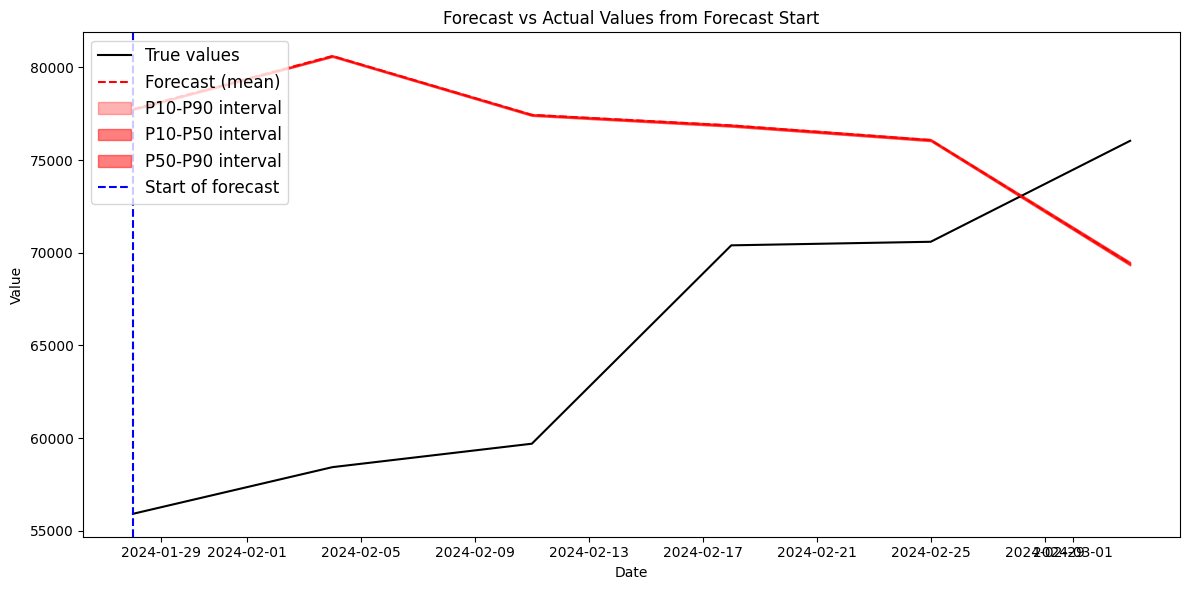

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the data, and it's sorted by the index (date)
target_column = 'BTC-CAD_High'  # Ensure this matches your actual target column name
# Assuming the DataFrame's index is a datetime index and sorted
end_training = df.index[-prediction_length]  # Assuming prediction_length is defined earlier

# Ensure forecast_start_date is a datetime object and exists in df.index
forecast_start_date = end_training 

# Plot the forecast and actual values starting from the forecast start date
plt.figure(figsize=(12, 6))

# Plot actual values from the start of the forecast
actuals_start_index = df.index.get_loc(forecast_start_date)
plt.plot(df.index[actuals_start_index:], df[target_column][actuals_start_index:], label="True values", color="black")

# Assuming mean_predictions, p10_predictions, p50_predictions, p90_predictions are defined from the forecasting model
# Plot forecast values
forecast_index = pd.date_range(start=forecast_start_date, periods=prediction_length, freq=freq)  # freq should be defined as per your data's frequency
plt.plot(forecast_index, mean_predictions, color='red', linestyle='--', label="Forecast (mean)")
plt.fill_between(forecast_index, p10_predictions, p90_predictions, color='red', alpha=0.3, label="P10-P90 interval")
plt.fill_between(forecast_index, p10_predictions, p50_predictions, color='red', alpha=0.5, label="P10-P50 interval")
plt.fill_between(forecast_index, p50_predictions, p90_predictions, color='red', alpha=0.5, label="P50-P90 interval")

# Add a vertical line and other plot elements
plt.axvline(x=forecast_start_date, color='blue', linestyle='--', label='Start of forecast')
plt.legend(loc="upper left", fontsize="large")
plt.title('Forecast vs Actual Values from Forecast Start')
plt.xlabel('Date')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


In [7]:
last_row = df.iloc[-prediction_length:, :]
last_row

,ETH-BTC_High,ETH-BTC_Low,ETH-CAD_High,ETH-CAD_Low,BTC-CAD_High,BTC-CAD_Low,Global_Liquidity_Index,btc_AdrBalNtv0.01Cnt,btc_AdrBalNtv0.1Cnt,btc_AdrBalNtv1Cnt,...,eth_CapRealUSD,eth_FeeByteMeanNtv,eth_FlowInExNtv,eth_FlowOutExNtv,eth_FlowTfrFromExCnt,eth_NDF,eth_SplyAct1d,eth_SplyActPct1yr,eth_TxCnt,eth_VelCur1yr
2024-01-28,0.055859,0.055439,3072.647217,2972.207764,55911.832031,53433.437500,116453.960855,12633297.0,4567555.0,1019448.0,...,166648580914.631012,0.000002,337560.058502,335879.624164,96945.0,0.676313,12921984.580539,36.412474,1128110.0,6.057301
2024-02-04,0.053801,0.053481,3113.128662,3042.415771,58429.691406,56831.171875,122454.180197,12619292.0,4572105.0,1019807.0,...,166826521384.526001,0.000003,333278.414166,335365.852424,102151.0,0.677078,12173746.145186,36.08737,1115710.0,6.050232
2024-02-11,0.053729,0.053706,3289.232178,3173.687988,59694.683594,57678.031250,125879.094272,12572725.0,4567171.0,1019356.0,...,168141406775.576691,0.000005,347428.606404,369227.537384,103803.0,0.678218,11882806.095639,35.867592,1075272.0,6.048036
2024-02-18,0.053777,0.053241,3774.248291,3555.355225,70401.203125,66844.632812,146207.883586,12511730.0,4556762.0,1017938.0,...,174331122786.240967,0.000003,306990.77022,337812.22673,96898.0,0.67948,12355803.333117,35.737851,1102512.0,6.039153
2024-02-25,0.057843,0.056463,4050.259277,3889.075195,70593.679688,68691.062500,148970.534800,12502508.0,4557570.0,1018191.0,...,177742339420.690826,0.000004,338244.178803,369824.650815,107578.0,0.680504,11852417.755627,35.479217,1102202.0,6.035038
2024-03-03,0.057818,0.058044,4377.375244,4193.781006,76043.402344,71398.765625,157919.116487,12510387.5,4559744.0,1017522.5,...,183390899981.701569,0.000005,408636.087004,474321.624988,129781.5,0.682438,13432666.965086,35.433164,1223333.5,6.047519


In [8]:
p50_predictions

array([77753.89, 80619.27, 77442.38, 76871.57, 76080.71, 69407.93],
      dtype=float32)

In [9]:
# Function to calculate sMAPE
def calculate_smape(forecasts, actuals):
    return 100 * np.mean(2 * np.abs(forecasts - actuals) / (np.abs(actuals) + np.abs(forecasts)))

# Calculate standard evaluation metrics for mean predictions
mae = np.mean(np.abs(mean_predictions - actuals))
rmse = np.sqrt(np.mean(np.square(mean_predictions - actuals)))
mape = np.mean(np.abs((mean_predictions - actuals) / actuals)) * 100
smape = calculate_smape(mean_predictions, actuals)

# Calculate the percentage of actuals within the 10th to 90th percentile range
within_range = np.sum((actuals >= p10_predictions) & (actuals <= p90_predictions)) / len(actuals) * 100

print("Evaluation Metrics for Mean Predictions:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"sMAPE: {smape:.2f}%")
print(f"Percentage of Actuals within P10-P90 Interval: {within_range:.2f}%")


Evaluation Metrics for Mean Predictions:
MAE: 13395.37
RMSE: 15277.63
MAPE: 22.08%
sMAPE: 19.31%
Percentage of Actuals within P10-P90 Interval: 0.00%


In [10]:
import os
import torch

# Define a path to save the model
model_save_path = 'ron_high.pth'

# Assuming 'predictor' is the trained model from DeepAREstimator
torch.save(predictor, model_save_path)

print(f'Model saved to {model_save_path}')


Model saved to ron_high.pth
